In [ ]:
#@title Importing lib
import pandas as pd 
import numpy as np 
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import math

In [ ]:
#@title Reading & Preprocessing 
df = pd.read_csv("/content/Case Study Data_CSV.csv")
df.tail()

,Agt # (6 txt),Agt Name,State,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
623,007882,"ZIEBA, ANDREW",IL,84%,83%,85%,85%,87%,86%,88%,...,87%,86%,86%,86%,86%,NaN,NaN,NaN,NaN,NaN
624,005793,"ZIEBA, PAUL",IL,70%,72%,70%,69%,71%,70%,68%,...,65%,65%,65%,64%,64%,NaN,NaN,NaN,NaN,NaN
625,022276,"ZIEGLER JR, JOSEPH C",IL,83%,85%,84%,82%,84%,82%,80%,...,77%,77%,76%,76%,76%,NaN,NaN,NaN,NaN,NaN
626,090473,"ZOLADZ, ROMAN",IL,92%,92%,92%,92%,91%,90%,92%,...,86%,86%,86%,86%,85%,NaN,NaN,NaN,NaN,NaN
627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(df.tail(1).index)

In [ ]:
# Print the first few rows of the DataFrame
print(df.head())

# Check for missing values
print(df.isnull().sum())

  Agt # (6 txt)         Agt Name State 2018.01 2018.02 2018.03 2018.04  \
0        060190    ABBADI , NUHA    IL     87%     87%     86%     85%   
1        057660  ABEL, THERESA      IL     73%     73%     73%     74%   
2        040026    ABEL, WILLIAM    IL     81%     79%     81%     81%   
3        022889     ADAMS, WANDA    IL     94%     95%     95%     93%   
4        029016    ADELMAN, MARK    MN     72%     72%     74%     73%   

  2018.05 2018.06 2018.07  ... 2021.03 2021.04 2021.05 2021.06 2021.07  \
0     85%     85%     87%  ...     85%     85%     85%     85%     84%   
1     72%     72%     71%  ...     66%     65%     65%     65%     65%   
2     80%     79%     80%  ...     78%     78%     78%     77%     77%   
3     93%     91%     91%  ...     91%     90%     90%     90%     90%   
4     72%     73%     75%  ...     73%     73%     73%     73%     72%   

  2021.08 2021.09 2021.10 2021.11 2021.12  
0     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     

In [ ]:
df = df.drop(columns=['2021.08', '2021.09', '2021.10', '2021.11', '2021.12'])
df

,Agt # (6 txt),Agt Name,State,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,...,2020.10,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07
0,060190,"ABBADI , NUHA",IL,87%,87%,86%,85%,85%,85%,87%,...,88%,87%,87%,86%,86%,85%,85%,85%,85%,84%
1,057660,"ABEL, THERESA",IL,73%,73%,73%,74%,72%,72%,71%,...,60%,62%,61%,66%,66%,66%,65%,65%,65%,65%
2,040026,"ABEL, WILLIAM",IL,81%,79%,81%,81%,80%,79%,80%,...,71%,72%,70%,79%,78%,78%,78%,78%,77%,77%
3,022889,"ADAMS, WANDA",IL,94%,95%,95%,93%,93%,91%,91%,...,87%,86%,87%,91%,91%,91%,90%,90%,90%,90%
4,029016,"ADELMAN, MARK",MN,72%,72%,74%,73%,72%,73%,75%,...,71%,73%,74%,74%,74%,73%,73%,73%,73%,72%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,037609,"ZHEN, JOHN",IL,82%,84%,84%,83%,83%,83%,82%,...,82%,80%,78%,81%,81%,81%,81%,80%,80%,80%
623,007882,"ZIEBA, ANDREW",IL,84%,83%,85%,85%,87%,86%,88%,...,88%,86%,85%,87%,87%,87%,86%,86%,86%,86%
624,005793,"ZIEBA, PAUL",IL,70%,72%,70%,69%,71%,70%,68%,...,62%,63%,64%,66%,65%,65%,65%,65%,64%,64%
625,022276,"ZIEGLER JR, JOSEPH C",IL,83%,85%,84%,82%,84%,82%,80%,...,71%,70%,70%,77%,77%,77%,77%,76%,76%,76%


In [ ]:
df = df.drop(df.tail(1).index)
df

,Agt # (6 txt),Agt Name,State,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,...,2020.10,2020.11,2020.12,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07
0,060190,"ABBADI , NUHA",IL,87%,87%,86%,85%,85%,85%,87%,...,88%,87%,87%,86%,86%,85%,85%,85%,85%,84%
1,057660,"ABEL, THERESA",IL,73%,73%,73%,74%,72%,72%,71%,...,60%,62%,61%,66%,66%,66%,65%,65%,65%,65%
2,040026,"ABEL, WILLIAM",IL,81%,79%,81%,81%,80%,79%,80%,...,71%,72%,70%,79%,78%,78%,78%,78%,77%,77%
3,022889,"ADAMS, WANDA",IL,94%,95%,95%,93%,93%,91%,91%,...,87%,86%,87%,91%,91%,91%,90%,90%,90%,90%
4,029016,"ADELMAN, MARK",MN,72%,72%,74%,73%,72%,73%,75%,...,71%,73%,74%,74%,74%,73%,73%,73%,73%,72%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,023120,"ZAGEL, PENNY",WI,92%,94%,93%,94%,95%,95%,94%,...,94%,95%,95%,93%,93%,93%,92%,92%,92%,92%
622,037609,"ZHEN, JOHN",IL,82%,84%,84%,83%,83%,83%,82%,...,82%,80%,78%,81%,81%,81%,81%,80%,80%,80%
623,007882,"ZIEBA, ANDREW",IL,84%,83%,85%,85%,87%,86%,88%,...,88%,86%,85%,87%,87%,87%,86%,86%,86%,86%
624,005793,"ZIEBA, PAUL",IL,70%,72%,70%,69%,71%,70%,68%,...,62%,63%,64%,66%,65%,65%,65%,65%,64%,64%


In [ ]:
df.columns 

Index(['Agt # (6 txt)', 'Agt Name', 'State', '2018.01', '2018.02', '2018.03',
       '2018.04', '2018.05', '2018.06', '2018.07', '2018.08', '2018.09',
       '2018.10', '2018.11', '2018.12', '2019.01', '2019.02', '2019.03',
       '2019.04', '2019.05', '2019.06', '2019.07', '2019.08', '2019.09',
       '2019.10', '2019.11', '2019.12', '2020.01', '2020.02', '2020.03',
       '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.09',
       '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03',
       '2021.04', '2021.05', '2021.06', '2021.07'],
      dtype='object')

In [ ]:
#@title Transforming & converting dateformat
# Transform the data from wide to long format
df_long = df.melt(id_vars=['Agt # (6 txt)', 'Agt Name', 'State'], var_name='date', value_name='performance')

# Convert the 'date' column to datetime format
df_long['date'] = pd.to_datetime(df_long['date'], format='%Y.%m')

# Remove the '%' from the 'performance' column and convert it to a float
df_long['performance'] = df_long['performance'].str.rstrip('%').astype('float')

# Group the data by date and get the mean of performance, assuming that average performance can represent the overall sales trend
df_grouped = df_long.groupby('date')['performance'].mean().reset_index()


In [ ]:
#@title ignore 
""" # Initialize the model
model = Prophet()

# Fit the model to the data
model.fit(df_grouped.rename(columns={'date': 'ds', 'performance': 'y'}))

# Make a future dataframe for 2 years
future = model.make_future_dataframe(periods=24, freq='M')

# Predict the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast) """

" # Initialize the model\nmodel = Prophet()\n\n# Fit the model to the data\nmodel.fit(df_grouped.rename(columns={'date': 'ds', 'performance': 'y'}))\n\n# Make a future dataframe for 2 years\nfuture = model.make_future_dataframe(periods=24, freq='M')\n\n# Predict the future\nforecast = model.predict(future)\n\n# Plot the forecast\nfig = model.plot(forecast) "

In [ ]:
#@title Prophet prediction 

import pandas as pd
from prophet import Prophet
import plotly.graph_objects as go

# Initialize the model
model = Prophet()

# Fit the model to the data
model.fit(df_grouped.rename(columns={'date': 'ds', 'performance': 'y'}))

# Make a future dataframe for 2 years
future = model.make_future_dataframe(periods=24, freq='M')

# Predict the future
forecast = model.predict(future)

# Create a plotly graph
fig = go.Figure()

# Add the original data
fig.add_trace(go.Scatter(x=df_grouped['date'], y=df_grouped['performance'], mode='lines', name='Actual'))

# Add the forecasted data
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecasted'))

# Add the upper and lower confidence intervals
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='Upper Confidence Interval'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='Lower Confidence Interval'))

# Update layout
fig.update_layout(
    title='Forecasted Sales',
    xaxis_title='Date',
    yaxis_title='Sales',
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6vf6ef60/jpzmu980.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6vf6ef60/4oslh21i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4491', 'data', 'file=/tmp/tmp6vf6ef60/jpzmu980.json', 'init=/tmp/tmp6vf6ef60/4oslh21i.json', 'output', 'file=/tmp/tmp6vf6ef60/prophet_modelabdma8p4/prophet_model-20230517145541.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:55:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into a training set and a testing set
train = df_grouped[df_grouped['date'] < '2021-01-01']
test = df_grouped[df_grouped['date'] >= '2021-01-01']

# Fit the model to the training data
model = Prophet()
model.fit(train.rename(columns={'date': 'ds', 'performance': 'y'}))

# Make predictions on the testing set
forecast = model.predict(test.rename(columns={'date': 'ds', 'performance': 'y'}))

# Calculate error metrics
mae = mean_absolute_error(test['performance'], forecast['yhat'])
mse = mean_squared_error(test['performance'], forecast['yhat'])
# Calculate the root mean squared error
rmse = mean_squared_error(test['performance'], forecast['yhat'], squared=False)



print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'The root mean squared error of the model on the test set is {rmse}')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6vf6ef60/ee_zqwxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6vf6ef60/sm6w8w0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2405', 'data', 'file=/tmp/tmp6vf6ef60/ee_zqwxs.json', 'init=/tmp/tmp6vf6ef60/sm6w8w0y.json', 'output', 'file=/tmp/tmp6vf6ef60/prophet_modelx5v12t78/prophet_model-20230517145640.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 0.6858353978104016
MSE: 0.5757358583635552
The root mean squared error of the model on the test set is 0.7587725999029981


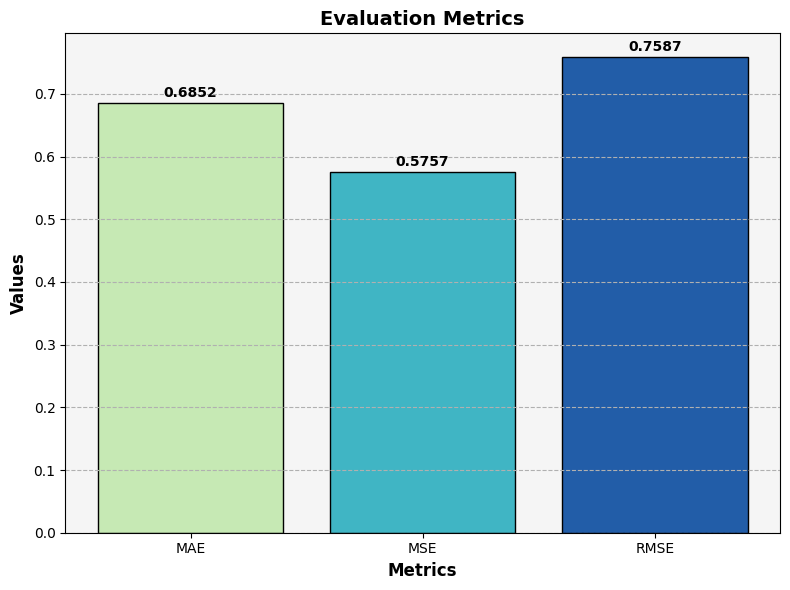

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
metrics = ['MAE', 'MSE', 'RMSE']
values = [0.6852, 0.5757, 0.7587]

# Set a warm blue color palette
colors = sns.color_palette('YlGnBu', len(metrics))

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors, edgecolor='black')

# Add data labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.01, str(v), ha='center', color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Values', fontsize=12, fontweight='bold')
plt.title('Evaluation Metrics', fontsize=14, fontweight='bold')

# Customize the tick parameters
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--')

# Set a light gray background color
plt.gca().set_facecolor('#F5F5F5')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
def create_dataset(dataset, look_back=3):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_grouped['performance'].values.reshape(-1, 1))

In [ ]:
#@title creating LSTM model
# warning message from TensorFlow about potential efficiency issues
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

# Splitting the data into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1, timestep 10
look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Generate LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the LSTM model
model.fit(X_train, Y_train, epochs=20, batch_size=70, verbose=2)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to prescaled values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

Epoch 1/20
1/1 - 3s - loss: 0.5914 - 3s/epoch - 3s/step
Epoch 2/20
1/1 - 0s - loss: 0.5565 - 17ms/epoch - 17ms/step
Epoch 3/20
1/1 - 0s - loss: 0.5220 - 15ms/epoch - 15ms/step
Epoch 4/20
1/1 - 0s - loss: 0.4822 - 15ms/epoch - 15ms/step
Epoch 5/20
1/1 - 0s - loss: 0.4214 - 14ms/epoch - 14ms/step
Epoch 6/20
1/1 - 0s - loss: 0.3998 - 14ms/epoch - 14ms/step
Epoch 7/20
1/1 - 0s - loss: 0.3651 - 12ms/epoch - 12ms/step
Epoch 8/20
1/1 - 0s - loss: 0.3355 - 12ms/epoch - 12ms/step
Epoch 9/20
1/1 - 0s - loss: 0.2910 - 13ms/epoch - 13ms/step
Epoch 10/20
1/1 - 0s - loss: 0.2639 - 12ms/epoch - 12ms/step
Epoch 11/20
1/1 - 0s - loss: 0.2270 - 13ms/epoch - 13ms/step
Epoch 12/20
1/1 - 0s - loss: 0.1964 - 13ms/epoch - 13ms/step
Epoch 13/20
1/1 - 0s - loss: 0.1768 - 14ms/epoch - 14ms/step
Epoch 14/20
1/1 - 0s - loss: 0.1425 - 14ms/epoch - 14ms/step
Epoch 15/20
1/1 - 0s - loss: 0.1347 - 12ms/epoch - 12ms/step
Epoch 16/20
1/1 - 0s - loss: 0.1001 - 14ms/epoch - 14ms/step
Epoch 17/20
1/1 - 0s - loss: 0.0774 -

In [ ]:
#@title train predictions
import plotly.graph_objects as go

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Create plotly graph
fig = go.Figure()

# Add the actual data
fig.add_trace(go.Scatter(x=df_grouped['date'], y=scaler.inverse_transform(dataset).flatten(), mode='lines', name='Actual'))

# Add the training data predictions
fig.add_trace(go.Scatter(x=df_grouped['date'][look_back:len(train_predict)+look_back], y=trainPredictPlot.flatten(), mode='lines', name='Train Prediction'))

# Add the testing data predictions
fig.add_trace(go.Scatter(x=df_grouped['date'][look_back + len(train_predict) + (look_back*2) + 1:], y=trainPredictPlot.flatten(), mode='lines', name='Test Prediction'))


# Update layout
fig.update_layout(
    title='Sales Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Sales',
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Add range selector buttons
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()


model seems to perform better on the test dataset than on the training dataset, which is relatively unusual. This might indicate that the model is underfitting the training data, or it might just be due to the specific characteristics of your test data set (perhaps it's easier to predict, or maybe it's smaller and thus the score is less reliable). It's also possible that this result is simply due to random variation.



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset and set the index as the 'Date' column
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Define the ARIMA model parameters (p, d, q)
p = 1  # AR order
d = 1  # Integration order
q = 1  # MA order

# Create and fit the ARIMA model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=len(test_data))[0]

# Calculate the root mean squared error (RMSE)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


KeyError: ignored